In [1]:
import msprime
import matplotlib.pyplot as plt
from sympy import symbols, exp
from sympy.plotting import plot
# from datetime import datetime

In [2]:
# set parameters
# num of trials
num=100000
n_samples=2
# num of recombinations per base per gen
pi=1e-7
# pi = 1e-7/gen/base
s_len=5000
# R = 1e-3/gen
pop_size=20000
# \pi LN = 10/gen (~1/gen)

# run the simulation

In [3]:
# define the function that finds the least coalescent time
def t_mrca_api(tree_s):
    t_ca_list = []
    for tree in tree_s.trees():
        t_ca_list.append(tree_s.tables.nodes[tree.root].time)
    return(min(t_ca_list))

In [4]:
# run the simulation num times
t_mrca_list = []
for idxx in range(num):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples/2,
        recombination_rate=pi,
        sequence_length=s_len,
        population_size=pop_size/2,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list.append(t_mrca_api(tree_s_sim))

In [5]:
# save the data
# with open("sim_"+datetime.now().strftime("%H_%M_%S")+".txt", 'w') as txtfile:
with open("sim_data.txt", 'w') as txtfile:
    txtfile.write(str(t_mrca_list))

# plot the data

In [6]:
# import the data
with open("sim_data.txt", 'r') as txtfile:
    t_mrca_list_text=txtfile.read();
start=1;
t_mrca_list=[];
for idx in range(num):
    if idx<num-1:
        end=t_mrca_list_text.index(", ");
        t_mrca_list.append(float(t_mrca_list_text[start:end]))
        t_mrca_list_text=t_mrca_list_text[end+1:len(t_mrca_list_text)];
    else:
        t_mrca_list.append(float(t_mrca_list_text[start:len(t_mrca_list_text)-1]))

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

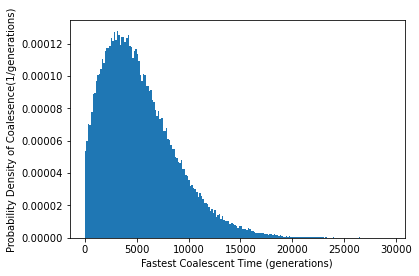

In [7]:
# plot the distribution
plt.hist(t_mrca_list, density=True, bins=200,range=(0,max(t_mrca_list)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

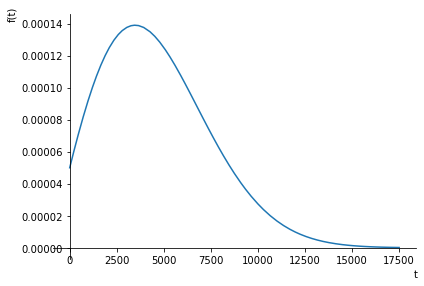

In [8]:
# plot the expectation
# PDF = \frac{Rt+1}{N}\exp(-\frac{R}{2N}t^2-\frac{1}{N}t)
t=symbols('t')
plot((2*pi*s_len*t+1)*exp(-2*pi*s_len*t**2/(2*pop_size)-t/pop_size)/pop_size,(t,0,17500))

In [9]:
# data for prediction
xnum=[i for i in range(int(max(t_mrca_list)))]
ynum=[(2*pi*s_len*t+1)*exp(-2*pi*s_len*t**2/(2*pop_size)-t/pop_size)/pop_size for t in range(int(max(t_mrca_list)))]

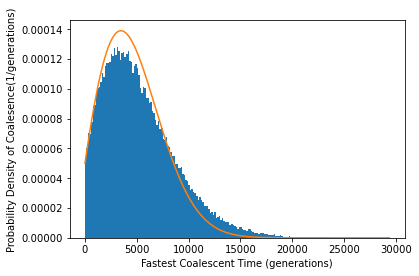

In [10]:
# overlay plot
plt.hist(t_mrca_list, density=True, bins=200,range=(0,max(t_mrca_list)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")
plt.plot(xnum,ynum)